In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from surprise import KNNBasic
from surprise import accuracy
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split
from surprise.model_selection import KFold

from read_and_split_data import split_data

In [2]:
def get_dataset():
    anime = pd.read_parquet("../datasets/anime.parquet")
    anime = anime[["anime_id", "type"]]
    users = pd.read_parquet("../datasets/users.parquet")
    base_df = users.merge(anime, on="anime_id", how="left")
    return base_df

base_df = get_dataset()
data = split_data(base_df)

In [3]:
kf = KFold(n_splits=5)

In [4]:
def predict_and_error(data, algo, path):
    fold = 0
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        predictions = algo.test(testset)
        # Mean Squared Error
        accuracy.rmse(predictions, verbose=True)
        # Mean Absolute Erro
        accuracy.mse(predictions, verbose=True)
        # Mean Absolute Erro
        accuracy.mae(predictions, verbose=True)
        # Fraction of Concordant Pairs
        accuracy.fcp(predictions, verbose=True)
        base_df = pd.DataFrame(columns=["user", "anime", "actual", "est", "details"], data=predictions)
        base_df.to_csv(f"{path}_{fold}.csv")
        base_df.to_parquet(f"{path}_{fold}.parquet")
        fold += 1
    return predictions

In [73]:
def set_axis_style(ax, labels):
    ax.xaxis.set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1))
    ax.set_xticklabels(labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    
def plot_violin_graph(list_of_data, title):
    # Create a figure instance
    label = ["fold 0", "fold 1", "fold 2", "fold 3"]
    fig = plt.figure()
  
    # Create an axes instance
    ax = fig.gca()
    ax.set_title(title)
    set_axis_style(ax, label)
    # Create the violinplot
    violinplot = ax.violinplot(list_of_data)
    plt.show()

### Cosine Similarity

In [5]:
algo = KNNBasic(k=7, sim_options={"name": "cosine", "user_based": False})

In [6]:
predictions_cosine = predict_and_error(data, algo, path="../predictions/knn_basic/anime_type_tv/no_filter/knn_basic_cosine")

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 2.2099
MSE: 4.8838
MAE:  1.5287
FCP:  0.6209
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 2.2082
MSE: 4.8763
MAE:  1.5279
FCP:  0.6215
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 2.2023
MSE: 4.8501
MAE:  1.5254
FCP:  0.6216
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 2.2044
MSE: 4.8594
MAE:  1.5254
FCP:  0.6219
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 2.2004
MSE: 4.8418
MAE:  1.5254
FCP:  0.6224


In [60]:
cossine_fold_0 = pd.read_parquet(f"../predictions/knn_basic/anime_type_tv/no_filter/knn_basic_cosine_0.parquet")
cossine_fold_1 = pd.read_parquet(f"../predictions/knn_basic/anime_type_tv/no_filter/knn_basic_cosine_1.parquet")
cossine_fold_2 = pd.read_parquet(f"../predictions/knn_basic/anime_type_tv/no_filter/knn_basic_cosine_2.parquet")
cossine_fold_3 = pd.read_parquet(f"../predictions/knn_basic/anime_type_tv/no_filter/knn_basic_cosine_3.parquet")

est_cossine_fold_0 = cossine_fold_0["est"].tolist()
actual_cossine_fold_0 = cossine_fold_0["actual"].tolist()
est_cossine_fold_1 = cossine_fold_1["est"].tolist()
actual_cossine_fold_1 = cossine_fold_1["actual"].tolist()
est_cossine_fold_2 = cossine_fold_2["est"].tolist()
actual_cossine_fold_2 = cossine_fold_2["actual"].tolist()
est_cossine_fold_3 = cossine_fold_3["est"].tolist()
actual_cossine_fold_3 = cossine_fold_3["actual"].tolist()

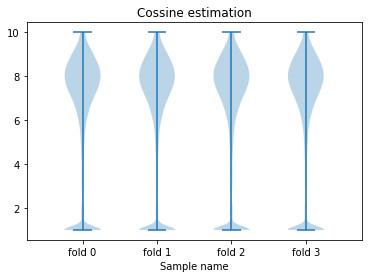

In [77]:
plot_violin_graph([est_cossine_fold_0, est_cossine_fold_1, est_cossine_fold_2, est_cossine_fold_3], title="Cossine estimation")

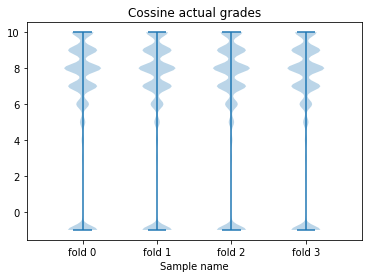

In [78]:
plot_violin_graph([actual_cossine_fold_0, actual_cossine_fold_1, actual_cossine_fold_2, actual_cossine_fold_3], title="Cossine actual grades")

### Mean Squared Difference

In [7]:
algo = KNNBasic(k=7, sim_options={"name": "msd", "user_based": False})

In [8]:
predictions_msd = predict_and_error(data, algo, path="../predictions/knn_basic/anime_type_tv/no_filter/knn_basic_msd")

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 2.1913
MSE: 4.8016
MAE:  1.5204
FCP:  0.6357
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 2.1894
MSE: 4.7937
MAE:  1.5157
FCP:  0.6374
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 2.1935
MSE: 4.8116
MAE:  1.5183
FCP:  0.6388
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 2.1854
MSE: 4.7761
MAE:  1.5154
FCP:  0.6392
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 2.1854
MSE: 4.7759
MAE:  1.5148
FCP:  0.6393


In [76]:
msd_fold_0 = pd.read_parquet(f"../predictions/knn_basic/anime_type_tv/no_filter/knn_basic_msd_0.parquet")
msd_fold_1 = pd.read_parquet(f"../predictions/knn_basic/anime_type_tv/no_filter/knn_basic_msd_1.parquet")
msd_fold_2 = pd.read_parquet(f"../predictions/knn_basic/anime_type_tv/no_filter/knn_basic_msd_2.parquet")
msd_fold_3 = pd.read_parquet(f"../predictions/knn_basic/anime_type_tv/no_filter/knn_basic_msd_3.parquet")

est_msd_fold_0 = msd_fold_0["est"].tolist()
actual_msd_fold_0 = msd_fold_0["actual"].tolist()
est_msd_fold_1 = msd_fold_1["est"].tolist()
actual_msd_fold_1 = msd_fold_1["actual"].tolist()
est_msd_fold_2 = msd_fold_2["est"].tolist()
actual_msd_fold_2 = msd_fold_2["actual"].tolist()
est_msd_fold_3 = msd_fold_3["est"].tolist()
actual_msd_fold_3 = msd_fold_3["actual"].tolist()

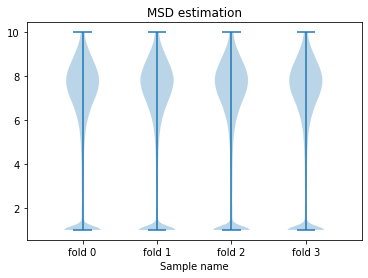

In [79]:
plot_violin_graph([est_msd_fold_0, est_msd_fold_1, est_msd_fold_2, est_msd_fold_3], title="MSD estimation")

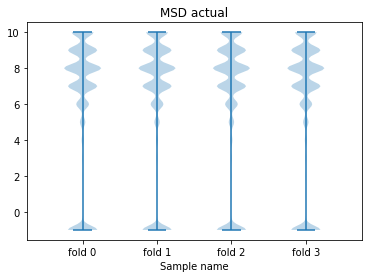

In [80]:
plot_violin_graph([actual_msd_fold_0, actual_msd_fold_1, actual_msd_fold_2, actual_msd_fold_3], title="MSD actual")

### Pearson

In [9]:
algo = KNNBasic(k=7, sim_options={"name": "pearson", "user_based": False})

In [10]:
predictions_pearson = predict_and_error(data, algo, path="../predictions/knn_basic/anime_type_tv/no_filter/knn_basic_pearson")

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 2.2503
MSE: 5.0637
MAE:  1.5975
FCP:  0.5810
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 2.2472
MSE: 5.0497
MAE:  1.5950
FCP:  0.5812
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 2.2453
MSE: 5.0411
MAE:  1.5947
FCP:  0.5797
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 2.2436
MSE: 5.0337
MAE:  1.5929
FCP:  0.5804
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 2.2421
MSE: 5.0271
MAE:  1.5936
FCP:  0.5804


### Pearson Baseline

In [11]:
algo = KNNBasic(k=7, sim_options={"name": "pearson_baseline", "user_based": False})

In [12]:
predictions_pearson_baseline = predict_and_error(data, algo, path="../predictions/knn_basic/anime_type_tv/no_filter/knn_basic_pearson_baseline")

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 2.0871
MSE: 4.3560
MAE:  1.4219
FCP:  0.6862
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 2.0835
MSE: 4.3412
MAE:  1.4201
FCP:  0.6863
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 2.0880
MSE: 4.3596
MAE:  1.4220
FCP:  0.6874
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 2.0878
MSE: 4.3590
MAE:  1.4231
FCP:  0.6850
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 2.0853
MSE: 4.3485
MAE:  1.4199
FCP:  0.6862


### Graphs

In [43]:
knn_basic_cossine = pd.read_parquet(f"../predictions/knn_basic/anime_type_tv/no_filter/knn_basic_cosine.parquet")
knn_basic_msd = pd.read_parquet(f"../predictions/knn_basic/anime_type_tv/no_filter/knn_basic_msd.parquet")
knn_basic_pearson = pd.read_parquet(f"../predictions/knn_basic/anime_type_tv/no_filter/knn_basic_pearson.parquet")
knn_basic_pearson_baseline = pd.read_parquet(f"../predictions/knn_basic/anime_type_tv/no_filter/knn_basic_pearson_baseline.parquet")

In [44]:
def plot_violin_graph(list_of_data):
    # Create a figure instance
    fig = plt.figure()
  
    # Create an axes instance
    ax = fig.gca()
    # Create the violinplot
    violinplot = ax.violinplot(list_of_data)
    plt.show()

In [48]:
list_cossine = knn_basic_cossine["actual"].tolist()
list_msd = knn_basic_msd["actual"].tolist()
list_pearson = knn_basic_pearson["actual"].tolist()
list_pearson_baseline = knn_basic_pearson_baseline["actual"].tolist()

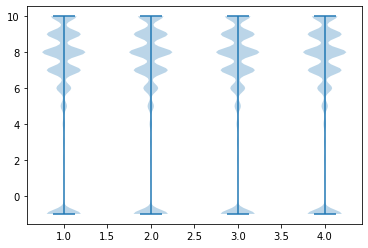

In [49]:
plot_violin_graph([list_cossine, list_msd, list_pearson, list_pearson_baseline])